In [15]:
import pandas as pd

In [16]:
# xls to xlsx
import win32com.client as win32

In [24]:
# C-유통업체의 가격만 추출
def check_area(area, dataframe):
    LIST = []
    flag = False
    for i in range(len(dataframe)):
        if flag is True:
            break
        if dataframe.loc[i]['구분'] == area:
            k = i+1
            while type(dataframe.loc[k]['구분']) == float:
                if dataframe.loc[k][1] == 'C-유통':
                    break
                k += 1
    
    for i in range(len(dataframe.loc[k][2:-3])):
        x = dataframe.loc[k][2:-3][i].replace(',', '')
        LIST.append(int(x))
    #print(LIST)
    
    return LIST, k

In [12]:
# 조사 지역에서 유통가격만 추출
def distribution_price(dataframe):
    area = ['서울', '대구', '전주', '제주']
    total = 0
    cnt = 0
    for i in range(len(dataframe)):
        if dataframe.loc[i]['구분'] in area:
            #print("============지역=============:  ", dataframe.loc[i]['구분'])
            j = i+1
            if j == len(dataframe):
                break
            while j != len(dataframe) and type(dataframe.loc[j]['구분']) == float:
                if '유통' in dataframe.loc[j][1]:
                    cnt += 1
                    tmp = dataframe.loc[j][-1].replace(',', '')
                    #print("tmp:  ", tmp)
                    if tmp == '-':
                        total += 0
                    else:
                        total += int(tmp)
                    #print("total:  ", total)
                j += 1
                
    result = round(total / cnt, 2)
    
    return result

In [17]:
# 전체 평년 가격 추출
def avg_price(dataframe):        
    tmp = dataframe.loc[1][-1].replace(',', '')
    

In [19]:
area = 'Jeju'
year = 19
month = 11
weeks = 1

Jeju = []
Seoul = []
Daegu = []
Jeonju = []
all_area = []


fname = "C:\\Users\\jobgs\\Desktop\\CONCAT_INTERNSHIP\\CONCAT-DataAnalysis_Project\\Data-Jeju\\{0}-가격정보-{1}년{2}월{3}주차.xls".format(area, year, month, weeks)
excel = win32.gencache.EnsureDispatch('Excel.Application')
wb = excel.Workbooks.Open(fname)

if excel.DisplayAlerts == False:
    wb.SaveAs(fname+"x", FileFormat = 51) #FileFormat = 51 is for .xlsx extension
    excel.DisplayAlerts = True
else:
    wb.Close() #FileFormat = 56 is for .xls extension
    excel.Application.Quit()


df = pd.read_excel('{0}-가격정보-{1}년{2}월{3}주차.xlsx'.format(area, year, month, weeks))
weeks += 1

df.loc[1][-1]

'1,694'

In [25]:
area = 'Jeju'
year = 19
month = 11
weeks = 1

Jeju = []
Seoul = []
Daegu = []
Jeonju = []
all_area = []

# 2020년 1, 2, 3월까지 제주도, 서울, 대구, 전주 "깻잎"가격 소매가 조사
flag = False
real_check = False
while month%12 < 12:
    # 1개월치 매주 가격분포 조사
    check = False
    try:
        while True:
            if flag == True:
                real_check = True
                break
            fname = "C:\\Users\\jobgs\\Desktop\\CONCAT_INTERNSHIP\\CONCAT-DataAnalysis_Project\\Data-Jeju\\{0}-가격정보-{1}년{2}월{3}주차.xls".format(area, year, month, weeks)
            excel = win32.gencache.EnsureDispatch('Excel.Application')
            wb = excel.Workbooks.Open(fname)
            
            if excel.DisplayAlerts == False:
                wb.SaveAs(fname+"x", FileFormat = 51) #FileFormat = 51 is for .xlsx extension
                excel.DisplayAlerts = True
            else:
                wb.Close() #FileFormat = 56 is for .xls extension
                excel.Application.Quit()
            

            df = pd.read_excel('{0}-가격정보-{1}년{2}월{3}주차.xlsx'.format(area, year, month, weeks))
            weeks += 1
            
            #dst_avg = distribution_price(df)
            # 조사 지역 소매가격의 평년가격
            #all_area.append(dst_avg)
            
            # 전체 평년 가격 추출
            all_avg = df.loc[1][-1].replace(',', '')
            all_area.append(int(all_avg))
            
            
            # 제주 C-유통
            price_list_jeju = []
            length_jeju = len(df.iloc[-1]) - 5
            for i in range(length_jeju):
                x = df.iloc[-1][2:-3][i].replace(',', '')
                price_list_jeju.append(int(x))
            #print("제주도:  ",price_list_jeju)
            avg = sum(price_list_jeju) / length_jeju
            #globals()['{0}'.format('Jeju')].append(round(avg, 2))  # 매주 평균값을 제주 리스트에 저장
            Jeju.append(round(avg, 2))

            
            # 서울 C-유통
            price_list_seoul, sidx = check_area('서울', df)
            #print("서울:  ",price_list_seoul)
            length_seoul = len(price_list_seoul)
            avg = sum(price_list_seoul) / length_seoul
            #globals()['{0}'.format('Seoul')].append(round(avg, 2))  # 매주 평균값을 서울 리스트에 저장
            Seoul.append(round(avg, 2))
                
            # 대구 C-유통
            price_list_daegu, didx = check_area('대구', df)
            #print("대구:  ",price_list_daegu)
            length_daegu = len(price_list_daegu)
            avg = sum(price_list_daegu) / length_daegu
            #globals()['{0}'.format('Seoul')].append(round(avg, 2))  # 매주 평균값을 서울 리스트에 저장
            Daegu.append(round(avg, 2))
            
            # 전주 C-유통
            price_list_jeonju, jnidx = check_area('전주', df)
            #print("전주:  ",price_list_jeonju)
            length_jeonju = len(price_list_jeonju)
            avg = sum(price_list_jeonju) / length_jeonju
            #globals()['{0}'.format('Seoul')].append(round(avg, 2))  # 매주 평균값을 서울 리스트에 저장
            Jeonju.append(round(avg, 2))
            
            check = True
            print("Here!!!")
    except:
        print("Month Over!")
        month += 1
        weeks = 1
        print(year, month, weeks)
        if month > 12:
            month = 1
            year += 1
        if check == False:
            flag = True
    if real_check == True:
        print("All Over!")
        break

제주도:   [2950, 2950, 3200, 3200, 3200, 3200]
서울:   [1980, 1980, 1980, 1980, 1980, 1980]
대구:   [1980, 1980, 1980, 1980, 1980, 1980]
전주:   [1980, 1980, 1980, 1980, 1980, 1980]
Here!!!
제주도:   [2950, 2950, 2950, 2950, 2950, 2950]
서울:   [1980, 1980, 1980, 1980, 1980, 1980]
대구:   [1980, 1980, 1980, 1980, 1980, 1980]
전주:   [1980, 1980, 1980, 1980, 1980, 1980]
Here!!!
제주도:   [2700, 2700, 2950, 2950, 2950, 2950]
서울:   [1980, 1980, 1980, 1980, 1980, 1980]
대구:   [1980, 1980, 1980, 1980, 1980, 1980]
전주:   [1980, 1980, 1980, 1980, 1980, 1980]
Here!!!
제주도:   [2700, 2700, 2700, 2700, 2700, 2700]
서울:   [1980, 1980, 1980, 1980, 1980, 1980]
대구:   [1980, 1980, 1980, 1980, 1980, 1980]
전주:   [1980, 1980, 1980, 1980, 1980, 1980]
Here!!!
제주도:   [2700, 2700, 2700, 2700, 2700, 2700]
서울:   [1980, 1980, 1980, 1980, 1980, 1980]
대구:   [1980, 1980, 1980, 1980, 1980, 1980]
전주:   [1980, 1980, 1980, 1980, 1980, 1980]
Here!!!
Month Over!
19 12 1
제주도:   [2700, 2700, 2700, 2700, 2700]
서울:   [1980, 1980, 1980, 1980, 1980]


In [28]:
print('제주', Jeju)
print('서울', Seoul)
print('대구', Daegu)
print('전주', Jeonju)
print('평년', all_area)

제주 [3116.67, 2950.0, 2866.67, 2700.0, 2700.0, 2700.0, 2700.0, 3083.33, 3160.0, 3160.0, 3080.0, 3143.33, 3510.0, 3912.0, 3845.0, 3363.33, 3146.67, 3300.0, 3300.0, 3300.0, 3300.0, 3300.0, 3300.0, 3300.0]
서울 [1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0]
대구 [1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0]
전주 [1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 2068.0, 2200.0, 2200.0, 2334.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0, 1980.0]
평년 [1694, 1638, 1622, 1600, 1618, 1623, 1689, 1816, 1918, 1970, 1990, 2008, 1937, 1894, 1938, 1992, 1998, 1914, 1794, 1741, 1708, 1676, 1686, 1653]
24
24


In [49]:
# 5주차가 없는 월은 4주차까지의 평균값을 넣는다.
# AVG: 조사 지역의 모든 유통업체들의 소매가격들을 조사하여 평균을 구한 것
df1 = pd.DataFrame([Jeju, Seoul, Daegu, Jeonju, all_area], index="Jeju Seoul Daegu Jeonju AVG".split())
df2 = df1.T
#df2
df3 = df2.loc[3:]
df3

,Jeju,Seoul,Daegu,Jeonju,AVG
3,2700.00,1980.0,1980.0,1980.0,1600.0
4,2700.00,1980.0,1980.0,1980.0,1618.0
5,2700.00,1980.0,1980.0,1980.0,1623.0
6,2700.00,1980.0,1980.0,1980.0,1689.0
7,3083.33,1980.0,1980.0,1980.0,1816.0
8,3160.00,1980.0,1980.0,1980.0,1918.0
9,3160.00,1980.0,1980.0,1980.0,1970.0
10,3080.00,1980.0,1980.0,2068.0,1990.0
11,3143.33,1980.0,1980.0,2200.0,2008.0
12,3510.00,1980.0,1980.0,2200.0,1937.0


In [50]:
df3.to_csv('result.csv', index=False)

In [198]:
df2.index[:]
df2.loc[df2.index[1:4][0]]

Jeju      3143.33
Seoul     1980.00
Daegu     1980.00
Jeonju    2200.00
Name: 1/2, dtype: float64

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
#import matplotlib as mpl

plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (30,10)

In [12]:
#font_path = 'C:\\Users\\jobgs\Desktop\\CONCAT_INTERNSHIP\\CONCAT-DataAnalysis_Project\\Data-Jeju\\NanumFontSetup_TTF_GOTHIC\NanumGothic.ttf'
# 한글 폰트 설정하기
'''print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정파일 위치: ', mpl.matplotlib_fname())'''

"print ('버전: ', mpl.__version__)\nprint ('설치 위치: ', mpl.__file__)\nprint ('설정 위치: ', mpl.get_configdir())\nprint ('캐시 위치: ', mpl.get_cachedir())\nprint ('설정파일 위치: ', mpl.matplotlib_fname())"

In [11]:
'''font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 
font_list[:]'''

"font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')\n\n# ttf 폰트 전체갯수\nprint(len(font_list)) \nfont_list[:]"

In [5]:
'''f = [f.name for f in fm.fontManager.ttflist]
#print(len(font_list))
# 10개의 폰트명 만 출력
#f[:1060]
for i in f:
    if 'Nanum' in i:
        print(i)
        print("XX")'''

In [10]:
#[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

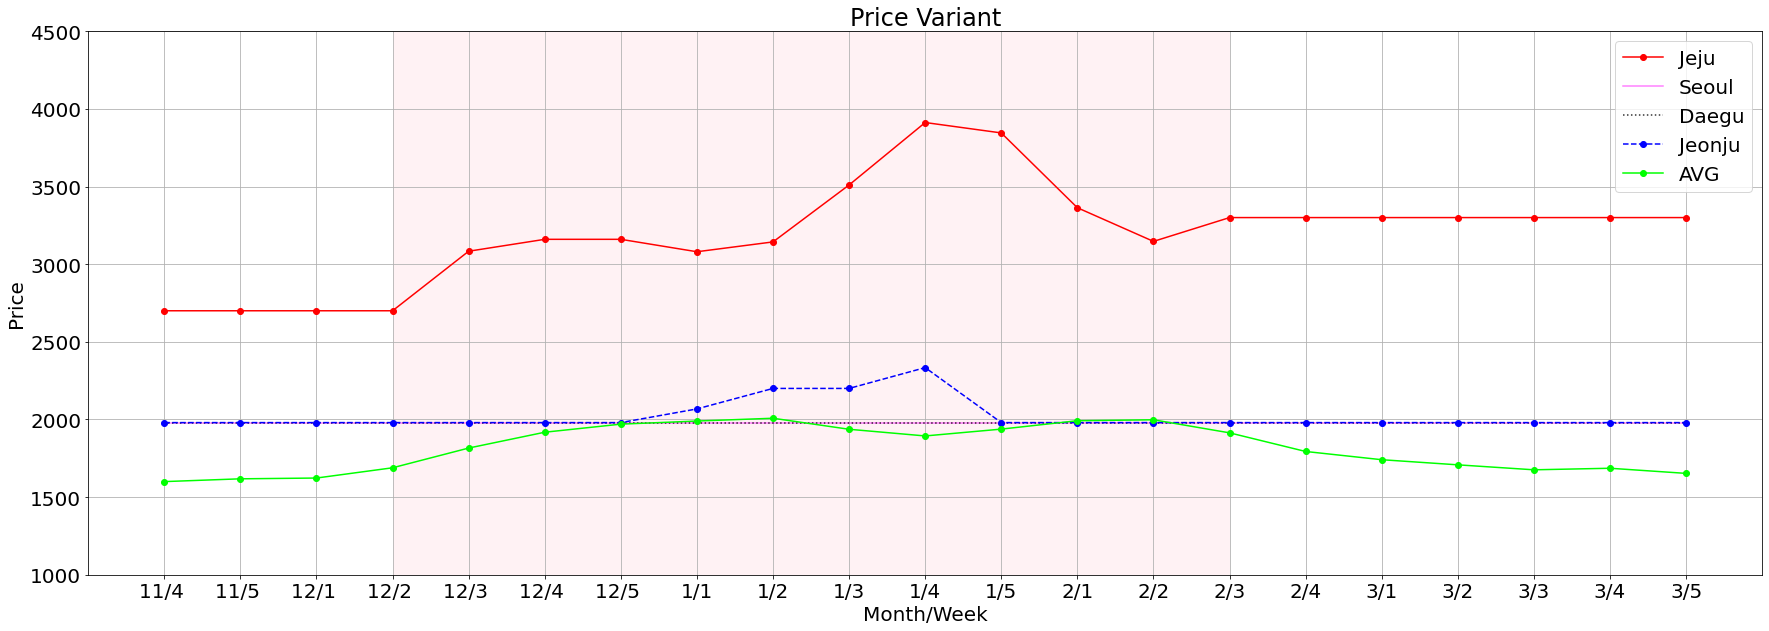

<Figure size 2160x720 with 0 Axes>

In [48]:
plt.plot(df3['Jeju'], 'r', marker='o', alpha=1)
plt.plot(df3['Seoul'], color='magenta', alpha=.5)
plt.plot(df3['Daegu'], 'k:', alpha=.8)
plt.plot(df3['Jeonju'], 'b--', marker='o')
plt.plot(df3['AVG'], color='lime', marker='o', alpha=1)
plt.legend(['Jeju', 'Seoul', 'Daegu', 'Jeonju', 'AVG'], loc=1)
plt.title('Price Variant')
plt.xlabel("Month/Week")
plt.xticks(df3.index[:], ['11/4 ', '11/5 ', '12/1 ', '12/2 ', '12/3 ', '12/4 ', '12/5 ', '1/1', '1/2', '1/3', '1/4', '1/5', '2/1', '2/2', '2/3', '2/4', '3/1', '3/2', '3/3', '3/4', '3/5'])
plt.ylabel("Price")
plt.ylim([1000, 4500])
plt.axvspan(df3.index[3], df3.index[14], facecolor='pink', alpha=0.2)
plt.show()
#plt.savefig('./result.jpg')